In [324]:
import sys
sys.path.insert(0, '../')

In [325]:
from skimage import io
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
# read input image
img = io.imread("../data/003_0.bmp")

# reshape the pixels matrix and nomalize it
# (height, width, channel) -> (height * width, channel)
pixels = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2])) / 255

# SOM initialization and training
print("training...")
som = MiniSom(4, 4, img.shape[2], sigma=1.0,
             learning_rate=0.1, neighborhood_function='gaussian') # 4x4 = 16 final colors
#som.random_weights_init(pixels)

# initialize SOM's wieghts with PCA technique (to span the first two principal components)
# it seems that using this gets stable result
som.pca_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights

# train SOM by picking samples at random from data
# and set maximum iteration to 500
som.train_random(pixels, 500, verbose=True) 

training...


 [ 500 / 500 ] 100% - 0.00039 it/s

 - quantization error: 0.051092672601010976


In [327]:
print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

quantization...
building new image...


/usr/local/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


done.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


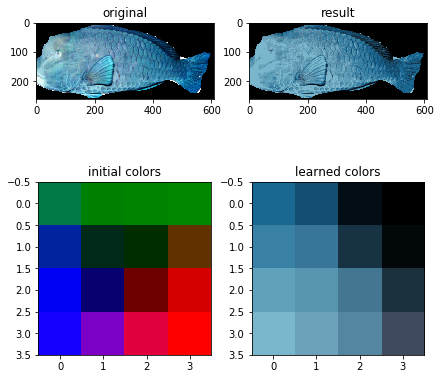

In [328]:
# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

In [329]:
# print starting and learned weights
# each row of the list represents the pixel value (color) of certain element
print("before learning")
print(starting_weights)
print("\nafter learning")
print(som.get_weights())

before learning
[[[-1.29780615  0.48517044  0.28338813]
  [-0.89324494  0.5026     -0.24620688]
  [-0.48868372  0.52002957 -0.77580189]
  [-0.08412251  0.53745913 -1.30539691]]

 [[-0.83716327  0.14429391  0.62405772]
  [-0.43260205  0.16172348  0.09446271]
  [-0.02804084  0.17915304 -0.4351323 ]
  [ 0.37652038  0.19658261 -0.96472732]]

 [[-0.37652038 -0.19658261  0.96472732]
  [ 0.02804084 -0.17915304  0.4351323 ]
  [ 0.43260205 -0.16172348 -0.09446271]
  [ 0.83716327 -0.14429391 -0.62405772]]

 [[ 0.08412251 -0.53745913  1.30539691]
  [ 0.48868372 -0.52002957  0.77580189]
  [ 0.89324494 -0.5026      0.24620688]
  [ 1.29780615 -0.48517044 -0.28338813]]]

after learning
[[[1.04743567e-01 4.06272252e-01 5.76082900e-01]
  [8.39238760e-02 3.08580874e-01 4.43822770e-01]
  [1.38442564e-02 5.41502521e-02 8.34731609e-02]
  [3.73178729e-04 2.17148641e-03 3.81653231e-03]]

 [[2.21857043e-01 5.08120042e-01 6.47774137e-01]
  [2.16824833e-01 4.63322739e-01 5.89554011e-01]
  [9.03625163e-02 1.9993